A look into the causes of job resignations in 2012 from the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

Looking into this data we are primarily looking to answer the following questions


1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?
3. Does the data reveal any areas for further exploration?

In [1]:
import pandas as pd
import numpy as np


In [2]:
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [3]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

The original data from the Dete survey has: 
56 Columns, 822 Entries
For all the columns excluding 5 there are at least 735 entries.

Those five columns have between 3-123 entries. These are Business Unit, Disability, Aboriginal, NESB(I need to find out what this is), Torres Straight, South Sea.

Of these five the Business Unit seems to stand out for a couple of reasons. One that it is more likely this data was not adequately input. Also where the other columns have between 3-32 entries the Business Unit column has 123.
The remaining columns refer more to enthinicity or disability.
 
Looking at these columns it is likely they are worth looking at seperately to the rest of the dataset.

In [4]:
dete_survey.head(10)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994,1997,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,D,D,NaN,Female,41-45,NaN,NaN,NaN,NaN,NaN
6,7,Age Retirement,05/2012,1972,2007,Teacher,Secondary,Darling Downs South West,NaN,Permanent Part-time,...,D,D,SD,Female,56-60,NaN,NaN,NaN,NaN,NaN
7,8,Age Retirement,05/2012,1988,1990,Teacher Aide,NaN,North Coast,NaN,Permanent Part-time,...,SA,NaN,SA,Female,61 or older,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009,2009,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,A,D,N,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997,2008,Teacher Aide,NaN,Not Stated,NaN,Permanent Part-time,...,SD,SD,SD,Female,46-50,NaN,NaN,NaN,NaN,NaN


A couple of notes on the above
1. Can likely make ID the index
2. Get value counts for SeperationType, Region, Position,  Age these seem like reasonable subgroups to break the data down into. Also classification just to get an idea of what thisdata represents
3. Need to look at DETE start date and Role Start date, access if both columns are necesarry


In [5]:
dete_survey['SeparationType'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64

In [6]:
dete_survey['Position'].value_counts()

Teacher                                                    324
Teacher Aide                                               137
Public Servant                                             126
Cleaner                                                     97
Head of Curriculum/Head of Special Education                38
Schools Officer                                             24
School Administrative Staff                                 16
Guidance Officer                                            12
Technical Officer                                           11
Professional Officer                                         7
Other                                                        7
School Based Professional Staff (Therapist, nurse, etc)      5
School Principal                                             5
Deputy Principal                                             4
Business Service Manager                                     4
Name: Position, dtype: int64

There are 3 weird values associated with Teacher, Teacher Aide and Public Servant. Can look into this later in the piece.

In [7]:
dete_survey['Region'].value_counts()

Metropolitan                135
Central Office              130
South East                  108
Not Stated                  105
Darling Downs South West     95
Central Queensland           84
North Coast                  75
North Queensland             53
Far North Queensland         37
Name: Region, dtype: int64

The Not Stated category needs to be read into the csv file as NaN

In [8]:
dete_survey['Classification'].value_counts()

Primary              161
Secondary            124
A01-A04               66
AO5-AO7               46
Special Education     33
AO8 and Above         14
PO1-PO4                8
Middle                 3
Name: Classification, dtype: int64

There are sufficiently few columns here that necessitate more study. The coding system needs to be broken down into user friendly names and classifications if they are to have any meaning.
 - Unfortunately there was insufficient contextual information, which means that this column now becomes something to note. But there is no ability to draw additional meaning for this column.

In [9]:
dete_survey['Age'].value_counts()

61 or older      222
56-60            174
51-55            103
46-50             63
41-45             61
26-30             57
36-40             51
21-25             40
31-35             39
20 or younger      1
Name: Age, dtype: int64

This is definitely a column to explore. For the first place looking at retirement. How retirement is handled will be important with this data set.

In [10]:
dete_survey.isnull()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,True,True,True,True
3,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,True,True,True
4,False,False,False,False,False,False,True,False,True,False,...,False,False,False,False,False,True,True,True,True,True
5,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,True,True,True,True,True
6,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,True,True,True
7,False,False,False,False,False,False,True,False,True,False,...,False,True,False,False,False,True,True,True,True,True
8,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,True,True,True
9,False,False,False,False,False,False,True,False,True,False,...,False,False,False,False,False,True,True,True,True,True


In [11]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

Looking at this survey it is organised very differently than the Dete Survey. How to organise these will be a challenging tasks. As will coming up with shorter names for the coumns that make the data easier to understand.

In [12]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [13]:
tafe_survey.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate oppo

Looking at the column names there is a lot of information that is superfluous 

In [14]:
tafe_survey.isnull()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
dete_survey = pd.read_csv('dete_survey.csv',na_values ='Not Stated')

In [16]:
dete_dropcols = dete_survey.columns[28:49]

In [17]:
dete_survey_updated = dete_survey.drop(dete_dropcols, axis =1)

In [18]:
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

In [19]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66],axis=1)

In [20]:
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
Record ID                                                                    702 non-null float64
Institute                                                                    702 non-null object
WorkArea                                                                     702 non-null object
CESSATION YEAR                                                               695 non-null float64
Reason for ceasing employment                                                701 non-null object
Contributing Factors. Career Move - Public Sector                            437 non-null object
Contributing Factors. Career Move - Private Sector                           437 non-null object
Contributing Factors. Career Move - Self-employment                          437 non-null object
Contributing Factors. Ill Health                                             437 non-null object
Contributing Factors

The columns removed in both the DETE and TAFE surveys help make the data easier to read. For the purpose of this project they make the data a lot easier to work with. If in a real work situation I would look closer at the individual columns to gain an understand ing of important they were. Also reading the surveys themselves would give a better understanding of the levels of relevance for each of these columns. 

However the columns remaining are the most likely to give inference to the questions that I am looking to answer.

In [21]:
dete_survey1 = dete_survey_updated

In [22]:
dete_survey1.columns =dete_survey1.columns.str.replace(' ','_').str.strip().str.lower()

In [23]:
dete_survey1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
id                                     822 non-null int64
separationtype                         822 non-null object
cease_date                             788 non-null object
dete_start_date                        749 non-null float64
role_start_date                        724 non-null float64
position                               817 non-null object
classification                         455 non-null object
region                                 717 non-null object
business_unit                          126 non-null object
employment_status                      817 non-null object
career_move_to_public_sector           822 non-null bool
career_move_to_private_sector          822 non-null bool
interpersonal_conflicts                822 non-null bool
job_dissatisfaction                    822 non-null bool
dissatisfaction_with_the_department    822 non-null bool
physical_work_envir

In [24]:
tafe_columns_dic ={'Record ID': 'id','CESSATION YEAR': 'cease_date','Reason for ceasing employment': 'separationtype','Gender. What is your Gender?': 'gender','CurrentAge. Current Age': 'age','Employment Type. Employment Type': 'employment_status','Classification. Classification': 'position'
,'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service','LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

In [25]:
tafe_survey1 = tafe_survey_updated

In [26]:
tafe_survey1 = tafe_survey1.rename(columns =tafe_columns_dic)

In [27]:
tafe_survey1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
id                                                     702 non-null float64
Institute                                              702 non-null object
WorkArea                                               702 non-null object
cease_date                                             695 non-null float64
separationtype                                         701 non-null object
Contributing Factors. Career Move - Public Sector      437 non-null object
Contributing Factors. Career Move - Private Sector     437 non-null object
Contributing Factors. Career Move - Self-employment    437 non-null object
Contributing Factors. Ill Health                       437 non-null object
Contributing Factors. Maternity/Family                 437 non-null object
Contributing Factors. Dissatisfaction                  437 non-null object
Contributing Factors. Job Dissatisfaction              437 non-null 

This change has improved the readibility of the columns. The next set of coumns to be changed should be 'Contributing Factors'

In [28]:
tafe_survey1.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [29]:
dete_survey1.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [30]:
tafe_columns_dic2 = {'Contributing Factors. Career Move - Public Sector ':'cf_career_move_to_public_sector',
       'Contributing Factors. Career Move - Private Sector ':'cf_career_move_to_private_sector',
       'Contributing Factors. Career Move - Self-employment':'cf_career_move_to_self_employment',
       'Contributing Factors. Ill Health':'cf_ill_health',
       'Contributing Factors. Maternity/Family':'cf_maternity/family',
       'Contributing Factors. Dissatisfaction':'cf_dissatisfaction',
       'Contributing Factors. Job Dissatisfaction':'cf_job_dissatisfaction',
       'Contributing Factors. Interpersonal Conflict':'cf_interpersonal_conflicts',
       'Contributing Factors. Study':'study', 'Contributing Factors. Travel':'cf_travel',
       'Contributing Factors. Other':'other', 'Contributing Factors. NONE':'cf_none_of_the_above'}

In [31]:
tafe_survey1 = tafe_survey1.rename(columns =tafe_columns_dic2)

In [32]:
tafe_survey1.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'cf_career_move_to_public_sector', 'cf_career_move_to_private_sector',
       'cf_career_move_to_self_employment', 'cf_ill_health',
       'cf_maternity/family', 'cf_dissatisfaction', 'cf_job_dissatisfaction',
       'cf_interpersonal_conflicts', 'study', 'cf_travel', 'other',
       'cf_none_of_the_above', 'gender', 'age', 'employment_status',
       'position', 'institute_service', 'role_service'],
      dtype='object')

In [33]:
dete_survey1['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [34]:
tafe_survey1['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [35]:
tafe_resignations = tafe_survey1[tafe_survey1['separationtype']=='Resignation'].copy()

In [36]:
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separationtype,cf_career_move_to_public_sector,cf_career_move_to_private_sector,cf_career_move_to_self_employment,cf_ill_health,cf_maternity/family,...,study,cf_travel,other,cf_none_of_the_above,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [37]:
dete_survey1['separationtype'] = dete_survey1['separationtype'].str.split('-').str[0]


In [38]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'] == 'Resignation'].copy()

In [39]:
dete_resignations['separationtype'].value_counts()

Resignation    311
Name: separationtype, dtype: int64

I have separated both surveys to include only the data where the employee resigned. In the tafe survey there was only one option for resignation, whereas in the dete survey there were three which have been combined into one for easier interpretation across both surveys. Also for the purpose of this analysis the further differentiation of reasons forresignation doesn't serve a purpose. 

In [40]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
07/2006      1
2010         1
09/2010      1
Name: cease_date, dtype: int64

In [41]:
dete_resignations['dete_start_date'].value_counts()

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [42]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype("float")

In [43]:
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [44]:
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

Looking at the two surveys there are some years that don't align between the two. This does not matter in the scheme of our analysis.

In [45]:
dete_resignations["institute_service"]=dete_resignations['cease_date']-dete_resignations['dete_start_date']

In [46]:
dete_resignations["institute_service"].value_counts(dropna=False)

NaN      38
 5.0     23
 1.0     22
 3.0     20
 0.0     20
 6.0     17
 4.0     16
 9.0     14
 2.0     14
 7.0     13
 13.0     8
 8.0      8
 20.0     7
 15.0     7
 12.0     6
 22.0     6
 17.0     6
 10.0     6
 14.0     6
 16.0     5
 18.0     5
 24.0     4
 23.0     4
 11.0     4
 39.0     3
 32.0     3
 19.0     3
 21.0     3
 36.0     2
 30.0     2
 25.0     2
 28.0     2
 26.0     2
 29.0     1
 42.0     1
 38.0     1
 27.0     1
 41.0     1
 35.0     1
 49.0     1
 34.0     1
 33.0     1
 31.0     1
Name: institute_service, dtype: int64

In [47]:
dete_resignations.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'institute_service'],
      dtype='object')

In this next section we will look at whether there was any dissatisfaction that lead to resignations. 

In [48]:
tafe_resignations.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'cf_career_move_to_public_sector', 'cf_career_move_to_private_sector',
       'cf_career_move_to_self_employment', 'cf_ill_health',
       'cf_maternity/family', 'cf_dissatisfaction', 'cf_job_dissatisfaction',
       'cf_interpersonal_conflicts', 'study', 'cf_travel', 'other',
       'cf_none_of_the_above', 'gender', 'age', 'employment_status',
       'position', 'institute_service', 'role_service'],
      dtype='object')

In [49]:
tafe_resignations['cf_job_dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: cf_job_dissatisfaction, dtype: int64

In [50]:
tafe_resignations['cf_dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: cf_dissatisfaction, dtype: int64

In [51]:
def updated_vals(x):
    if x=='-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True
    
tafe_resignations['dissatisfied'] = tafe_resignations[['cf_dissatisfaction','cf_job_dissatisfaction']].applymap(updated_vals).any(axis=1,skipna=False)
tafe_resignations_up = tafe_resignations.copy()

tafe_resignations_up['dissatisfied'].value_counts()

False    241
True      91
Name: dissatisfied, dtype: int64

In [52]:
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction','dissatisfaction_with_the_department','physical_work_environment','lack_of_recognition','lack_of_job_security','work_location','employment_conditions','work_life_balance','workload']].applymap(updated_vals).any(1,skipna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts()

True    311
Name: dissatisfied, dtype: int64

There is a large discrepancy between the two different surveys on how much dissatisfaction there is with the jobs. Where the survey design for the dete survey design captured more nuanced data in relation to dissatisfaction. Whereas with the Tafe Survey it was more a binary view, hence the much larger False count in dissatisfied. 

In [53]:
dete_resignations_up['institute'] = 'DETE'

In [54]:
dete_resignations_up.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied,institute
3,4,Resignation,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,True,DETE
5,6,Resignation,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True,DETE
8,9,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,True,DETE
9,10,Resignation,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0,True,DETE
11,12,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0,True,DETE


In [55]:
tafe_resignations_up['institute']='TAFE'

In [56]:
tafe_resignations_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 701
Data columns (total 25 columns):
id                                   340 non-null float64
Institute                            340 non-null object
WorkArea                             340 non-null object
cease_date                           335 non-null float64
separationtype                       340 non-null object
cf_career_move_to_public_sector      332 non-null object
cf_career_move_to_private_sector     332 non-null object
cf_career_move_to_self_employment    332 non-null object
cf_ill_health                        332 non-null object
cf_maternity/family                  332 non-null object
cf_dissatisfaction                   332 non-null object
cf_job_dissatisfaction               332 non-null object
cf_interpersonal_conflicts           332 non-null object
study                                332 non-null object
cf_travel                            332 non-null object
other                                3

In [57]:
dete_resignations_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 38 columns):
id                                     311 non-null int64
separationtype                         311 non-null object
cease_date                             300 non-null float64
dete_start_date                        283 non-null float64
role_start_date                        271 non-null float64
position                               308 non-null object
classification                         161 non-null object
region                                 265 non-null object
business_unit                          32 non-null object
employment_status                      307 non-null object
career_move_to_public_sector           311 non-null bool
career_move_to_private_sector          311 non-null bool
interpersonal_conflicts                311 non-null bool
job_dissatisfaction                    311 non-null bool
dissatisfaction_with_the_department    311 non-null bool
physical_work_envir

In [58]:
combined = pd.concat([dete_resignations_up,tafe_resignations_up],ignore_index =True)

In [59]:
combined_updated = combined.dropna(thresh = 500, axis =1).copy()

In [60]:
combined_updated = combined.dropna(thresh=500,axis=1).copy()

Next, we'll clean and reclassify the institute_service column according to the following definitions:

New: Less than 3 years in the workplace
Experienced: 3-6 years in the workplace
Established: 7-10 years in the workplace
Veteran: 11 or more years in the workplace


In [61]:
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


In [62]:
combined_updated['institute_service_up'].head()

0     7.0
1    18.0
2     3.0
3    15.0
4     3.0
Name: institute_service_up, dtype: float64

In [63]:
def service(y):
    
    if pd.isnull(y):
        return np.nan
    elif 0<y<3:
        return 'New'
    elif 3<=y<7:
        return 'Experienced'
    elif 7<=y<11:
        return 'Established'
    elif y>=11:
        return 'Veteran'
    





In [64]:
combined_updated['service_category'] = combined_updated['institute_service_up'].apply(service)

In [65]:
combined_updated['service_category'].value_counts()

New            173
Experienced    172
Veteran        136
Established     62
Name: service_category, dtype: int64

In [66]:
combined_updated['dissatisfied'].value_counts(dropna=False)

True     402
False    241
NaN        8
Name: dissatisfied, dtype: int64

In [67]:
combined_updated['dissatisfied'] =combined_updated['dissatisfied'].fillna(True)

In [68]:
combined_updated['dissatisfied'].value_counts()

True     410
False    241
Name: dissatisfied, dtype: int64

In [69]:
dissatisfied_plt =combined_updated.pivot_table(values='dissatisfied',index='service_category')

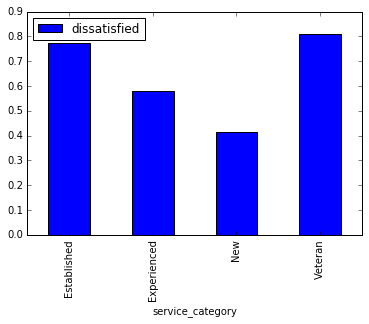

In [70]:
%matplotlib inline
dissatisfied_plt.plot(kind='bar')

The results of this plot show that the longer the person has been in the job the more likely they are to resign because of dissatisfaction. However there are a few clear flaws with theis plot. One is that the length of service categories are not ordered in a coherent way, ie from fewest to longest. This means it is not as clear to see the trends. Whilst it would make the titles longer, adding the years captured within the definitions would be instructive to people seeing this graph for the first time.